# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from dotenv import find_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
# ... loading it in my own way :)
load_dotenv(dotenv_path=find_dotenv())

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
# As I am in Australia, I'd prefer to see USD (and not CAD, or EUR, Or GBP, etc.)
# But will request and extract both as USD is default along with the requested curr.
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crypto
# Extract the price of BTC in CAD **AND** USD
cad_price_btc = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
usd_price_btc = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Now do the same for ETH.
cad_price_eth = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
usd_price_eth = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute the current monetary value of each "asset"
my_btc_value = my_btc*cad_price_btc
my_btc_val_usd = my_btc*usd_price_btc
#
my_eth_value = my_eth*cad_price_eth
my_eth_val_usd = my_eth*usd_price_eth

# Print current crypto wallet balance
# Add some space with a newline char for better viewing pleasure :)
print(f"\nThe current value of your {my_btc} BTC is ${my_btc_value:0.2f} (US${my_btc_val_usd:0.2f})")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} (US${my_eth_val_usd:0.2f})")


The current value of your 1.2 BTC is $51993.26 (US$42775.20)
The current value of your 5.3 ETH is $15164.05 (US$12475.56)


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# Fetch my key
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_api_secret = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
# NOTE: According to API documentation,
#       v2 of the API is default
alpaca = tradeapi.REST(alpaca_api_key, alpaca_api_secret)

In [8]:
# Format current date as ISO format
# Set TZ
NYC = 'America/New_York'

# Set start & end
# NOTE: See further notes below, where I call the API.
#       These are in effect, ignored.
start_date = pd.Timestamp('2015-06-01', tz=NYC).isoformat()
end_date = pd.Timestamp('2021-06-10', tz=NYC).isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
# NOTE: As 'day' is a synonym of '1D', I use it instead.
#timeframe = "1D"
timeframe = "day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Based on the API documentation ...
#    i. If 'end' date is omitted, "now" is returned, so I've decided to not
#       set the end date
#   ii. As the limit acts on the "most recent" data returned, setting it
#       to 1000 means the last 1000 days is returned (given the use of
#       the 'daily' timeframe).
#  iii. Therefore, I will also not set the 'start' date, so in effect
#       the last 1000 day bars are returned.
# Fetch the req. data into a DataFrame
investments_data = alpaca.get_barset(tickers, timeframe, limit=1000).df

# Preview DataFrame
# I prefer seeing a sample than head() or tail()
investments_data.sample(5)

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2018-03-29 00:00:00-04:00  106.95  107.26  106.95  107.235  5600597.0  261.10   
2021-04-21 00:00:00-04:00  114.60  114.74  114.53  114.740  5250384.0  411.51   
2018-09-27 00:00:00-04:00  105.50  105.64  105.50  105.625  2252805.0  290.44   
2019-07-01 00:00:00-04:00  111.25  111.27  111.01  111.165  3842950.0  296.68   
2020-11-25 00:00:00-05:00  118.15  118.21  118.02  118.080  3739909.0  363.13   

                                                               
                             high     low   close      volume  
time                                                           
2018-03-29 00:00:00-04:00  265.26  260.28  263.49  82896154.0  
2021-04-21 00:00:00-04:00  416.29  411.36  416.08  54772634.0  
2018-09-27 00:00:00-04:00  291.91  290.10  290.65  42099964.0  
2019-07-01 00:00:00-04:00  296.92  294.33  295.61  57465080.0  
2020-11-25 00:00:00-05:00  363.16  361.48  362.65  35309156.0

In [9]:
# Pick AGG and SPY close prices
# Find the last
agg_close_price = investments_data.iloc[-1]["AGG"]["close"]
spy_close_price = investments_data.iloc[-1]["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.24
Current SPY closing price: $424.32


In [10]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"\nThe current value of your {my_agg} AGG shares is US${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is US${my_spy_value:0.2f}")


The current value of your 200 AGG shares is US$23048.00
The current value of your 50 SPY shares is US$21216.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000.00

# Consolidate financial assets data
# As shares are in USD, including crypto values in USD
my_crypto_total = my_btc_val_usd + my_eth_val_usd
my_shares_total = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({"amount": [my_crypto_total, my_shares_total]}, index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,55250.764
shares,44264.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

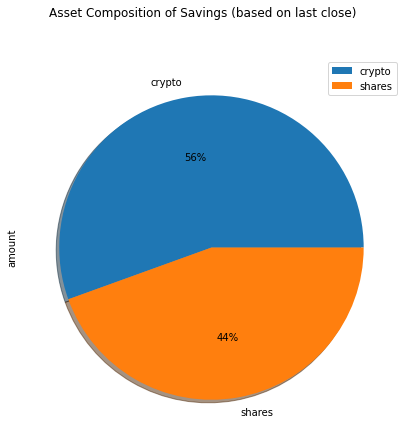

In [12]:
# Plot savings pie chart
# Experimenting a little ... if you place the commas
# at the start of the line you can comment out the
# line without having to rearrange things much.
# Also, used shadow and startangle for the first time.
df_savings.plot.pie(
    subplots=True
    ,shadow=True
    ,startangle=0
    ,autopct='%1.f%%'
    ,figsize=(10,7)
    ,title="Asset Composition of Savings (based on last close)\n"
)

In [13]:
# Set ideal emergency fund
# I personally think 6 months is more realistic as
# an emergency fund than what 3 months allows for.
emergency_fund = monthly_income * 6

# Calculate total amount of savings
total_savings = list(df_savings.sum())

# Validate saving health
# Print the appropriate message
if total_savings[0] > emergency_fund:
    print(f"\nCongratulations! Your savings of ${total_savings[0]:0.02f} "
          f"is more than enough for an emergency fund!!!")
elif total_savings[0] == emergency_fund:
    print(f"\nCongratulations! You've reached your savings goal of "
          f"${total_savings[0]:0.02f} ... you must be proud!")
else:
    print(f"\nYou're nearly there, keep going!!!"
          f"  You have ${(emergency_fund-total_savings[0]):0.02f} to go, "
          f"given your current savings of ${total_savings[0]:0.02f}")


Congratulations! Your savings of $99514.76 is more than enough for an emergency fund!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# I will get the last 2000 days' worth ... ~5 years is not enough for
# a decent Monte Carlo simulation, esp. id extrapolation is over 30 years.
# The data As in code above, to get last 1000 days (timeframe is 'day') start or end not req'd
#
# The investments_data DataFrame in part 1 has already been fetched for the data I need.
# To fetch the previous 1000 days, only an end date is required with limit=1000.
#
# Determine earliest date by checking the DataFrame
investments_data.head(1)

AGG                                     SPY  \
                             open    high     low   close     volume open   
time                                                                        
2017-06-21 00:00:00-04:00  109.88  110.04  109.88  109.98  1085301.0  NaN   

                                                 
                          high low close volume  
time                                             
2017-06-21 00:00:00-04:00  NaN NaN   NaN    NaN

In [16]:
# Set the date based on the earliest date returned
# Set a new date for the start of the MC simulation
# section, ignoring the value for end_date set above.
new_end_date = pd.Timestamp('2017-06-21', tz=NYC).isoformat()

# Get the Data for the 1000 days before the latest 1000
df_stock_data_prev_1k = alpaca.get_barset(tickers, timeframe, end=new_end_date, limit=1000).df

# Join the previous 1000 days with the most recent 1000 days
df_stock_data = pd.concat([investments_data,df_stock_data_prev_1k], axis='rows', join='inner')

# Sort the new 2000-day dataframe, ascending.
df_stock_data.sort_index(inplace=True)

# Drop any null/na rows
df_stock_data.dropna(inplace=True)

# Display sample data
df_stock_data.sample(5)

AGG                                         SPY  \
                             open    high     low   close      volume    open   
time                                                                            
2015-03-24 00:00:00-04:00  111.48  111.67  111.37  111.66   2576771.0  209.85   
2014-11-14 00:00:00-05:00  109.68  109.94  109.64  109.86   1009871.0  204.10   
2013-10-17 00:00:00-04:00  107.50  107.68  107.44  107.59    936704.0  171.36   
2015-11-18 00:00:00-05:00  108.65  108.71  108.54  108.62   1824597.0  206.04   
2020-09-14 00:00:00-04:00  118.47  118.49  118.31  118.37  11279340.0  337.49   

                                                                  
                             high       low   close       volume  
time                                                              
2015-03-24 00:00:00-04:00  210.40  208.7400  208.81   60175588.0  
2014-11-14 00:00:00-05:00  204.49  203.7200  204.25   56982418.0  
2013-10-17 00:00:00-04:00  173.32  171.3400  173.22  103625987.0  
2015-11-18 00:00:00-05:00  208.90  205.9900  208.71   94448031.0  
2020-09-14 00:00:00-04:00  340.38  334.2208  338.42  110083883.0

In [17]:
# Set required sim constants
num_sims = 500           # number of simulations
num_trdng_days = 252*30  # number of days to extrapolate
asset_weights = [.4,.6]  # 40/60 weighting

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = asset_weights,
    num_simulation = num_sims,
    num_trading_days = num_trdng_days
)

# Printing the simulation input data
print(f"\nRunning a Monte Carlo Simulation of {num_sims} run(s) over"
      f" {num_trdng_days/252:0.0f} year(s) given a {asset_weights[0]*100:0.0f}/{asset_weights[1]*100:0.0f} "
      f" split of Bonds/Stocks respectively.\n")


Running a Monte Carlo Simulation of 500 run(s) over 30 year(s) given a 40/60  split of Bonds/Stocks respectively.



In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997491,0.997296,0.992641,1.004671,0.984917,1.000100,1.000878,1.008400,0.991622,0.993794,...,0.992454,1.003901,1.004238,1.000923,0.994907,1.004324,1.001008,0.997887,1.002152,1.001725
2,0.994312,0.995584,0.996869,1.010012,0.976054,1.001477,0.996975,1.009094,0.991712,1.003807,...,0.990216,1.014092,0.999788,1.014348,0.988572,0.998553,0.994437,1.004227,1.008813,1.001119
3,0.986465,0.989406,1.005135,1.018505,0.988828,0.999728,1.000521,1.016313,0.989053,1.005581,...,1.005396,1.011190,1.007941,1.005574,0.982292,0.997371,0.990669,1.015141,1.005681,1.004592
4,0.991957,0.990663,1.010353,1.006616,0.983050,0.994697,1.000198,1.014063,0.980645,1.007936,...,1.011138,1.017786,1.000552,1.002658,0.977303,1.011666,0.993155,1.015681,1.009038,1.007465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.910213,8.381639,5.972153,5.421179,10.259046,26.902825,8.143529,14.579351,5.411745,9.688708,...,21.486371,16.866518,10.487266,17.637481,5.175068,10.185359,10.685858,20.717924,14.278056,6.342751
7557,10.791376,8.355990,5.932778,5.475240,10.183185,26.774953,8.162769,14.536847,5.400463,9.719240,...,21.372027,16.998411,10.466126,17.596453,5.221329,10.166407,10.692304,20.617496,14.327486,6.325805
7558,10.860616,8.350142,5.913107,5.461077,10.147518,26.513618,8.160178,14.514239,5.403107,9.797517,...,21.175736,17.052993,10.582385,17.831067,5.242943,10.262034,10.752540,20.618691,14.200558,6.373849
7559,10.694815,8.299760,5.870229,5.462651,10.123880,26.358039,8.176010,14.534332,5.381539,9.867032,...,21.349185,16.909001,10.544323,17.931283,5.256969,10.293971,10.716856,20.686109,14.276223,6.360889


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

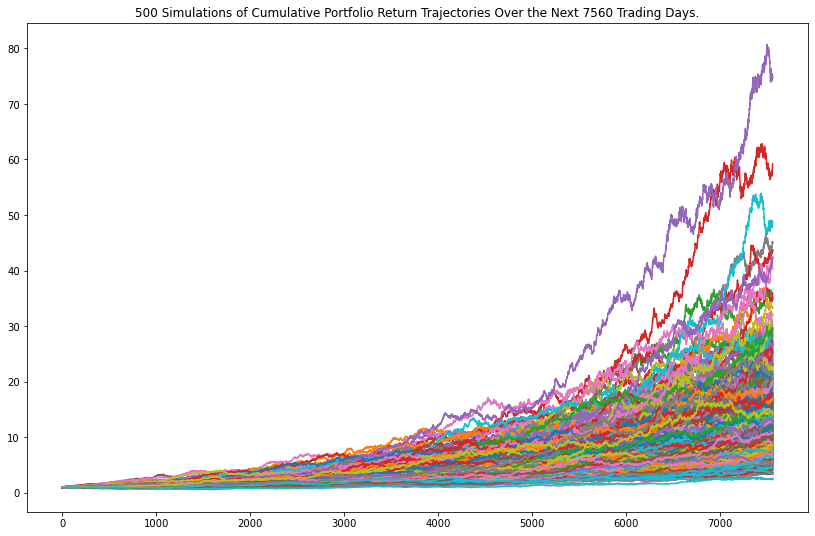

In [19]:
# Plot simulation outcomes
MC_thirty_yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

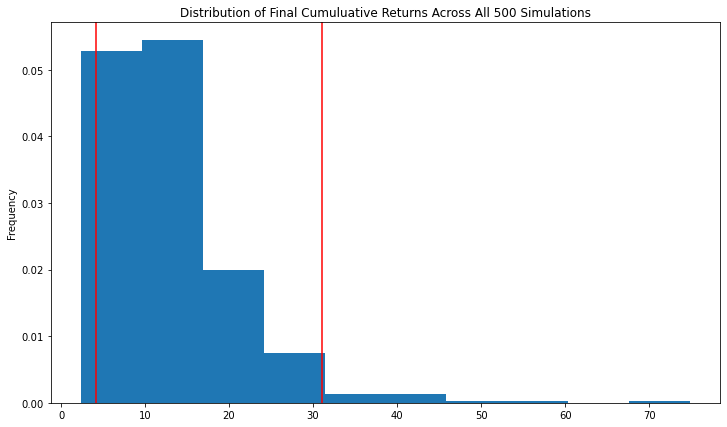

In [20]:
# Plot probability distribution and confidence intervals
MC_thirty_yrs.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_yr_stats = MC_thirty_yrs.summarize_cumulative_return()

# Print summary statistics
print("Summarised simulation results:")
print("------------------------------")
print(thirty_yr_stats)

Summarised simulation results:
------------------------------
count           500.000000
mean             13.107264
std               7.996811
min               2.372699
25%               7.786188
50%              11.020884
75%              16.114493
max              74.827100
95% CI Lower      4.182161
95% CI Upper     31.053140
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_yr_stats[8]*initial_investment)
ci_upper = round(thirty_yr_stats[9]*initial_investment)

# Print results
# Rounded up earlier ... makes for an easier reading experience
# corrected grammar ... from 'within in' to 'within'
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" \nover the next {num_trdng_days/252:0.0f} years, will end within the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio 
over the next 30 years, will end within the range of $83643 and $621063


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# No change ... code is identical
ci_lower = round(thirty_yr_stats[8]*initial_investment)
ci_upper = round(thirty_yr_stats[9]*initial_investment)

# Print results
# As above ... made the same changes plus formatting for initial investment
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment:0.0f} in the portfolio"
      f" \nover the next 30 years, will end within the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $30000 in the portfolio 
over the next 30 years, will end within the range of $125465 and $931594


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Resetting num_trdng_days to 5 years but with data, weights and sims the same.
num_trdng_days = 252*5

MC_five_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = asset_weights,
    num_simulation = num_sims,
    num_trading_days = num_trdng_days
)

# Provide a context-setting message, then run ...
print(f"\nRunning a Monte Carlo Simulation of {num_sims} run(s) over"
      f" {num_trdng_days/252:0.0f} year(s) given a {asset_weights[0]*100:0.0f}/{asset_weights[1]*100:0.0f}"
      f" split of Bonds/Stocks respectively.\n")


Running a Monte Carlo Simulation of 500 run(s) over 5 year(s) given a 40/60 split of Bonds/Stocks respectively.



In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994750,0.988372,0.992648,1.005856,0.993395,0.999312,0.994551,1.007756,0.994984,1.013592,...,1.011160,1.003113,1.005476,1.005329,1.004547,0.991607,1.002816,1.004220,1.004522,0.995827
2,1.006396,0.986701,0.994687,1.009492,0.994545,0.993313,1.000249,1.010059,1.003926,1.007075,...,1.003489,0.986869,1.007042,1.002481,0.990850,0.990390,1.001875,1.015747,1.004034,0.988167
3,1.007410,0.976129,0.997741,1.009637,0.988829,0.985542,0.998099,1.007405,1.001526,1.002553,...,1.008317,0.981795,1.007676,1.013426,0.991865,0.984455,1.009463,1.012041,1.007638,0.993983
4,1.012316,0.983679,0.996080,1.014573,0.995992,0.977669,1.004261,1.016608,0.989590,0.990121,...,1.000345,0.987045,1.014128,1.022671,1.007964,0.985731,1.006082,1.023704,1.005744,0.992138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.849599,1.545114,2.043233,1.395432,1.191307,2.029221,1.395659,1.306605,1.704343,1.658423,...,1.761879,1.228729,1.832880,2.142607,1.146911,1.688708,1.643927,1.742796,1.517504,1.523878
1257,1.863345,1.555076,2.069428,1.383677,1.200820,2.073419,1.401588,1.312667,1.694763,1.672893,...,1.770997,1.230136,1.849535,2.162853,1.147030,1.708534,1.652559,1.754169,1.515623,1.534255
1258,1.862623,1.570724,2.054093,1.378643,1.190827,2.046546,1.406704,1.330441,1.701906,1.675457,...,1.762684,1.230742,1.825239,2.160475,1.145908,1.693814,1.658725,1.768419,1.526949,1.529102
1259,1.858495,1.559358,2.061075,1.389649,1.187513,2.036142,1.414753,1.332204,1.704046,1.684605,...,1.738671,1.242256,1.829839,2.153504,1.135567,1.699900,1.648937,1.763702,1.522730,1.548752


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

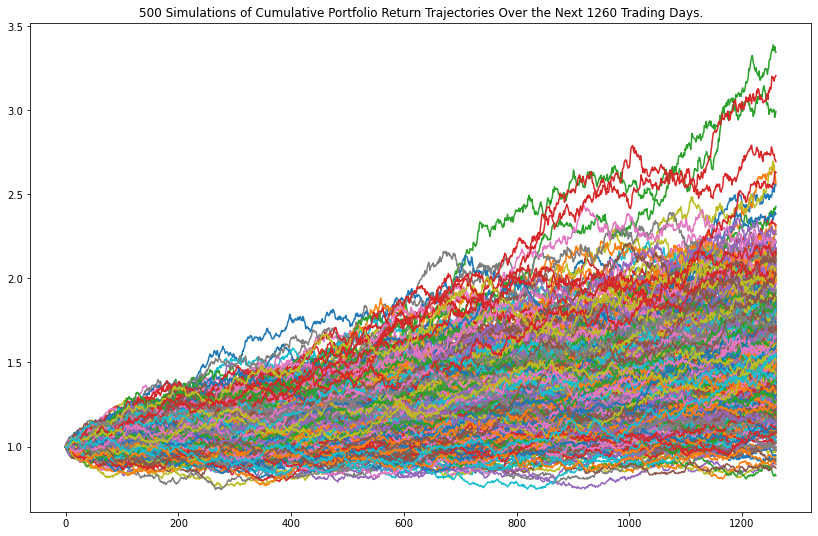

In [26]:
# Plot simulation outcomes
MC_five_yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

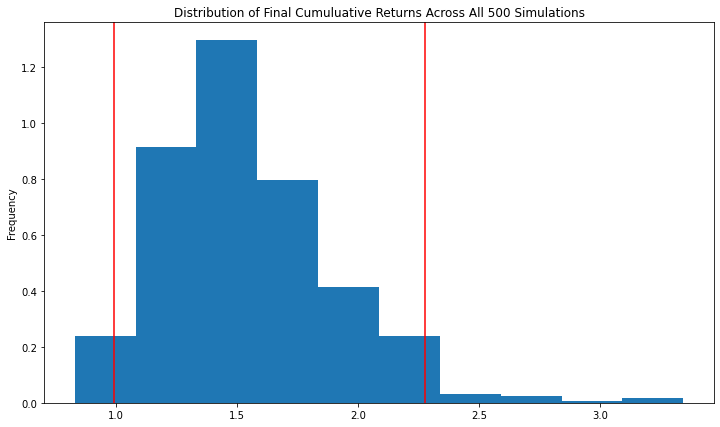

In [27]:
# Plot probability distribution and confidence intervals
MC_five_yrs.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
five_yr_stats = MC_five_yrs.summarize_cumulative_return()

# Print summary statistics
print("Summarised simulation results:")
print("------------------------------")
print(five_yr_stats)

Summarised simulation results:
------------------------------
count           500.000000
mean              1.544361
std               0.358006
min               0.828161
25%               1.290165
50%               1.492994
75%               1.754610
max               3.343813
95% CI Lower      0.989539
95% CI Upper      2.275840
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# Increasing the initial capital to 3 and 3/4 of what it initially was
initial_investment = 20000 * 3.75

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# Ignoring the $60k reference ... using as above
ci_lower_five = round(five_yr_stats[8]*initial_investment)
ci_upper_five = round(five_yr_stats[9]*initial_investment)

# Print results
# As in the cells where this printing is used above ...
# made the same changes plus formatting for initial investment
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment:0.0f} in the portfolio"
      f" \nover the next {num_trdng_days/252:0.0f} years, will end within the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")


There is a 95% chance that an initial investment of $75000 in the portfolio 
over the next 5 years, will end within the range of $74215 and $170688


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Resetting num_trdng_days to 10 years with the data, weights and sims the same.
num_trdng_days = 252*10

MC_ten_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = asset_weights,
    num_simulation = num_sims,
    num_trading_days = num_trdng_days
)

# Provide a context-setting message, then run ...
print(f"\nRunning a Monte Carlo Simulation of {num_sims} run(s) over"
      f" {num_trdng_days/252:0.0f} year(s) given a {asset_weights[0]*100:0.0f}/{asset_weights[1]*100:0.0f}"
      f" split of Bonds/Stocks respectively.\n")


Running a Monte Carlo Simulation of 500 run(s) over 10 year(s) given a 40/60 split of Bonds/Stocks respectively.



In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002854,0.991357,1.000885,1.008668,0.994964,0.995222,0.993227,0.995931,1.008082,1.006877,...,0.998929,0.994707,0.987521,1.003579,0.997072,0.982173,1.007382,0.987370,0.991540,1.003875
2,1.008339,0.996953,1.001523,1.009565,0.997466,0.989629,0.985512,0.999968,1.001778,1.007675,...,1.000421,0.985102,0.981178,1.008004,0.996391,0.985857,1.010793,0.994724,0.998287,1.007107
3,1.016273,0.987618,1.004653,0.999251,1.002300,0.988410,0.985507,1.006311,0.995792,1.005725,...,1.015154,0.995768,0.985668,1.018707,0.999789,0.977200,1.010289,0.996509,1.006803,1.012641
4,1.018651,0.979215,1.014235,0.999224,0.997876,0.997998,0.983107,1.016324,1.001215,1.007661,...,1.007795,0.992638,0.979064,1.018209,1.000627,0.975843,1.019746,0.996717,1.015545,1.009317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.855353,1.834446,2.853730,2.737048,1.768109,2.696838,1.258583,3.837389,1.231243,2.864905,...,1.818160,1.711775,2.272927,2.412239,2.766957,2.080136,2.438860,3.278754,2.175568,1.447214
2517,2.862503,1.849058,2.852244,2.695020,1.759592,2.673564,1.274874,3.857866,1.211853,2.859226,...,1.806921,1.725718,2.269367,2.405506,2.764687,2.081357,2.426450,3.299706,2.187217,1.437663
2518,2.831650,1.834729,2.813550,2.695308,1.770250,2.650805,1.282242,3.829452,1.223408,2.861570,...,1.811207,1.729480,2.260453,2.395127,2.785957,2.072671,2.443607,3.313840,2.204650,1.430458
2519,2.843943,1.844700,2.806864,2.725561,1.791187,2.645141,1.274845,3.819477,1.221558,2.856174,...,1.810243,1.747363,2.248242,2.404915,2.796106,2.048176,2.457114,3.323093,2.237901,1.435230


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

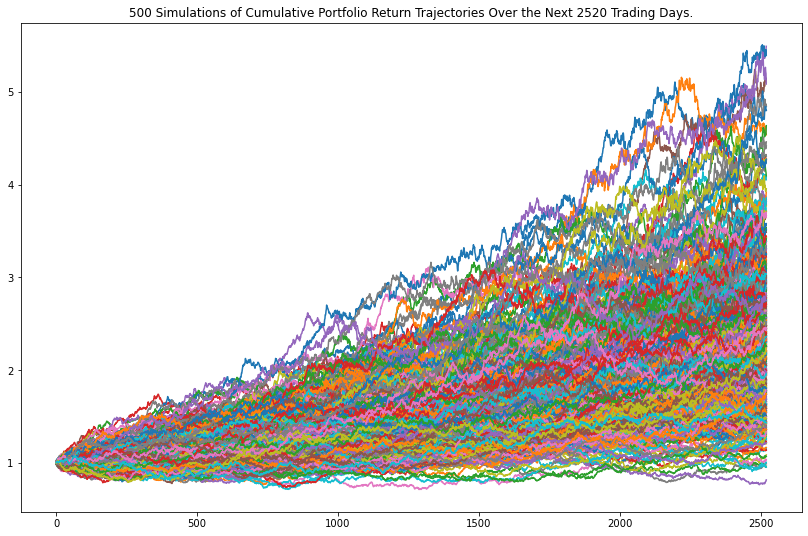

In [32]:
# Plot simulation outcomes
MC_ten_yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

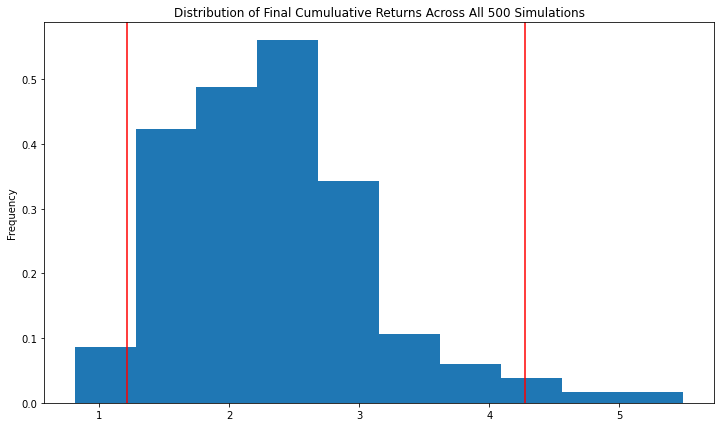

In [33]:
# Plot probability distribution and confidence intervals
MC_ten_yrs.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_yr_stats = MC_ten_yrs.summarize_cumulative_return()

# Print summary statistics
print("Summarised simulation results:")
print("------------------------------")
print(ten_yr_stats)

Summarised simulation results:
------------------------------
count           500.000000
mean              2.332446
std               0.760507
min               0.814304
25%               1.776863
50%               2.278799
75%               2.718497
max               5.491219
95% CI Lower      1.215982
95% CI Upper      4.274714
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# For 10 year, keeping the capital the same, i.e. $75k
initial_investment = 20000 * 3.75

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# Ignoring the $60k reference ... using as above
ci_lower_ten = round(ten_yr_stats[8]*initial_investment)
ci_upper_ten = round(ten_yr_stats[9]*initial_investment)

# Print results
# As in the cells where this printing is used above ...
# made the same changes plus formatting for initial investment
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment:0.0f} in the portfolio"
      f" \nover the next {num_trdng_days/252:0.0f} years, will end within the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")


There is a 95% chance that an initial investment of $75000 in the portfolio 
over the next 10 years, will end within the range of $91199 and $320604
